# Introduction Scikit-Learn

### Data as table

Using [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.

In [85]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [86]:
s1 = iris.head()
s1.columns = ['Feature','Feature','Feature','Feature','Label']
s1


,Feature,Feature,Feature,Feature,Label
0,5.100000,3.500000,1.400000,0.200000,setosa
1,4.900000,3.000000,1.400000,0.200000,setosa
2,4.700000,3.200000,1.300000,0.200000,setosa
3,4.600000,3.100000,1.500000,0.200000,setosa
4,5.000000,3.600000,1.400000,0.200000,setosa


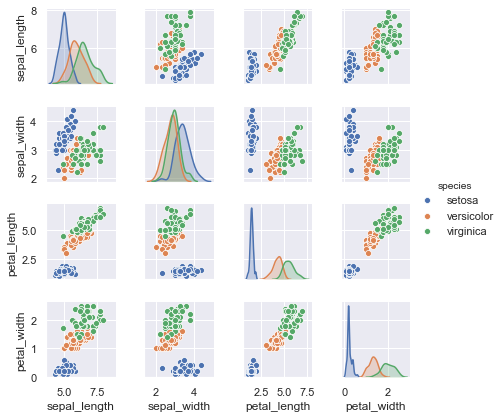

In [87]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

(10.0, -2.0)

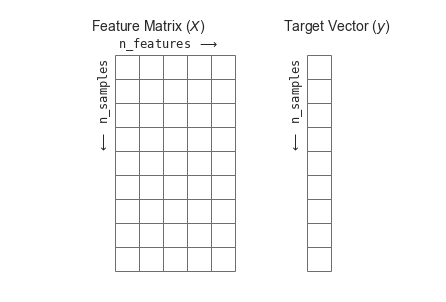

In [88]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.axis('equal')

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=8, xmax=9, lw=1)
ax.text(7, -1, "Target Vector ($y$)", size=14)
ax.text(7.9, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

ax.set_ylim(10, -2)

## Scikit-Learn's Estimator API

Some popular packages from sklearn

In [89]:
import sklearn.cluster                            # for clustering task
import sklearn.model_selection                    # function like train_test_split
from sklearn import datasets                           # sklearn build in datasets
import sklearn.decomposition                      # PCA
import sklearn.feature_extraction                 # Define image and text datas
import sklearn.feature_selection                  # Find meaningful features


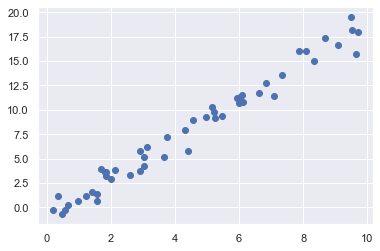

In [100]:
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [101]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [102]:
import numpy as np
X = x[:, np.newaxis]
X.shape

(50, 1)

In [103]:
model.fit(X, y)

LinearRegression()

In [104]:
model.coef_

array([1.9776566])

In [105]:
model.intercept_

-0.9033107255311146

### Supervised learning example: Iris classification

In [106]:
from sklearn.model_selection import train_test_split
X_iris, y_iris = iris.drop('species', axis=1), iris['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [107]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: Iris dimensionality
use principal component analysis (PCA), to get a two-dimensional representation of the data.

In [109]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

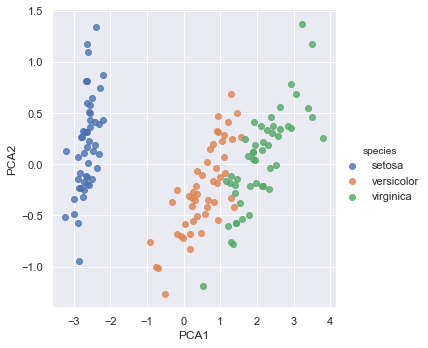

In [110]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False)

### Unsupervised learning: Iris clustering

Clustering with Gaussian mixture model (GMM).

In [111]:
from sklearn.mixture import GaussianMixture     # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')             # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                               # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                   # 4. Determine cluster labels

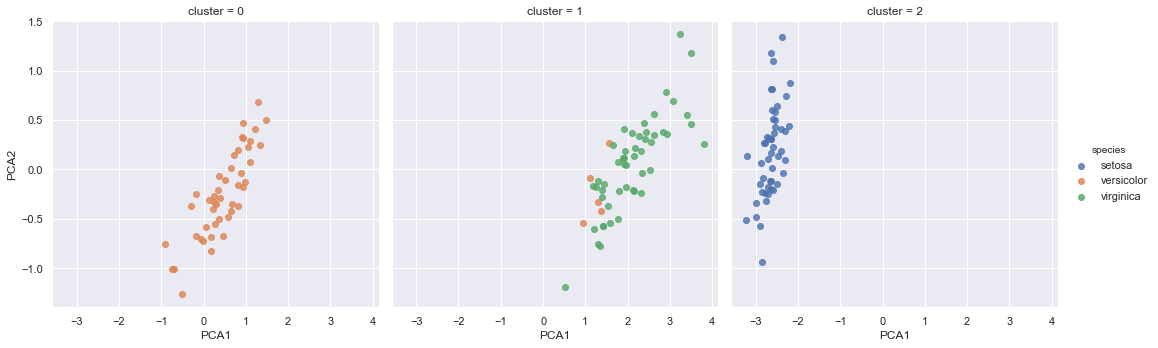

In [112]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False)

In [113]:
iris.cluster

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    1
147    1
148    1
149    1
Name: cluster, Length: 150, dtype: int64

## Application: Exploring Hand-written Digits

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [114]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

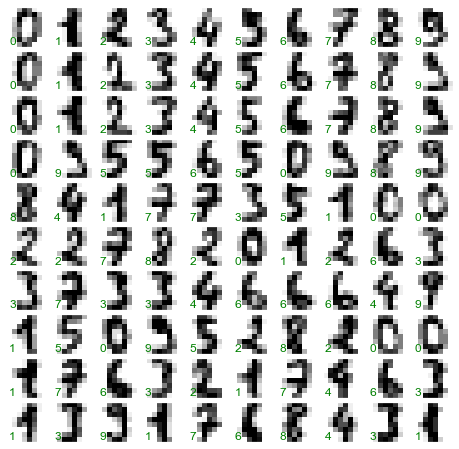

In [115]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [117]:
X, y = digits.data, digits.target
X.shape

(1797, 64)

### Unsupervised learning: Dimensionality reduction

Below is an example using *Isomap* to reduce the dimensions from 64 to 2.

In [118]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

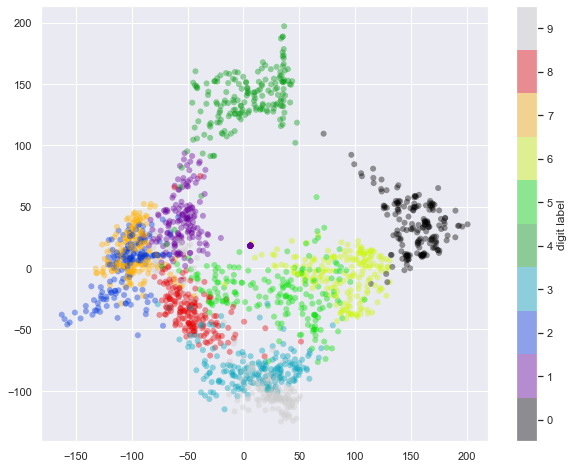

In [119]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.4,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits
Gaussian naive Bayes model

In [120]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [121]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

With even this extremely simple model, we find about 80% accuracy for classification of the digits!
However, this single number doesn't tell us *where* we've gone wrong—one nice way to do this is to use the *confusion matrix*, which we can compute with Scikit-Learn and plot with Seaborn:

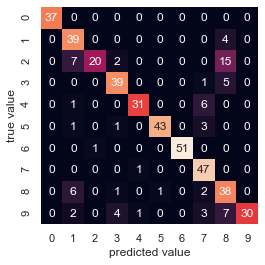

In [123]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

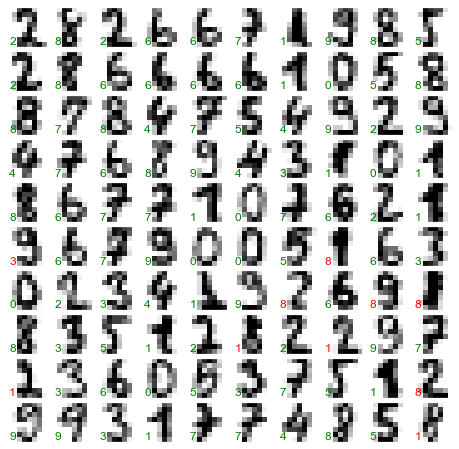

In [125]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')